# Credit Card Churn - Classification Using Tabular Data

Using various classification algorithms, the goal of this analysis was to determine which model resulted in the most robust metrics to predict credit card churn. The primary focus was prediction rather than interpretation. The best model can be used by a credit card company or bank to determine whether or not an applicant should be accepted for a credit card with minimal risk of churn as well as tailoring services to maintain accounts for existing customers.

1. Import Libraries
2. Exploratory Data Analysis
3. Data Preprocessing
4. Classification Models for Credit Card Churn and Graphs of Results
    1. Logistic Regression
    2. Random Forest
    3. XGBoost
    4. CatBoost
    5. Voting Classifier
    6. Overview of Scores for Models
    

### Import Libraries

In [141]:
import numpy as np
import pandas as pd
from pandas.plotting import table
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE

import pickle as pkl
import warnings
warnings.filterwarnings('ignore')


In [7]:
df = pd.read_csv('BankChurners.csv')

### Exploratory Data Analysis

In [8]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [10]:
df.drop(df.columns[[-2, -1]], axis=1, inplace=True)
df.drop('CLIENTNUM', axis=1, inplace=True)

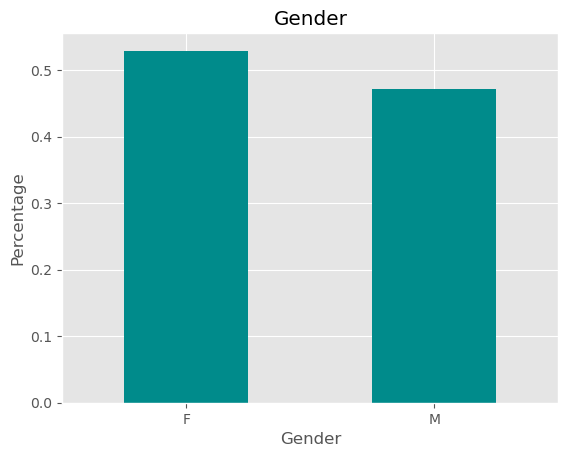

In [29]:
df['Gender'].value_counts(normalize=True).plot(kind='bar', color='darkcyan')
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

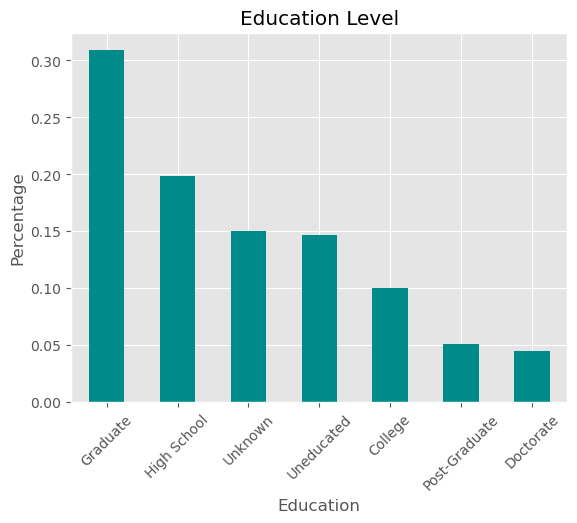

In [21]:
df['Education_Level'].value_counts(normalize=True).plot(kind='bar', color='darkcyan')
plt.title('Education Level')
plt.xlabel('Education')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

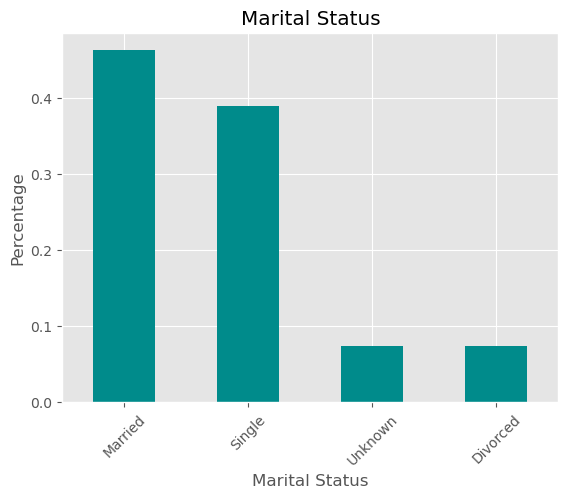

In [20]:
df['Marital_Status'].value_counts(normalize=True).plot(kind='bar', color='darkcyan')
plt.title('Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

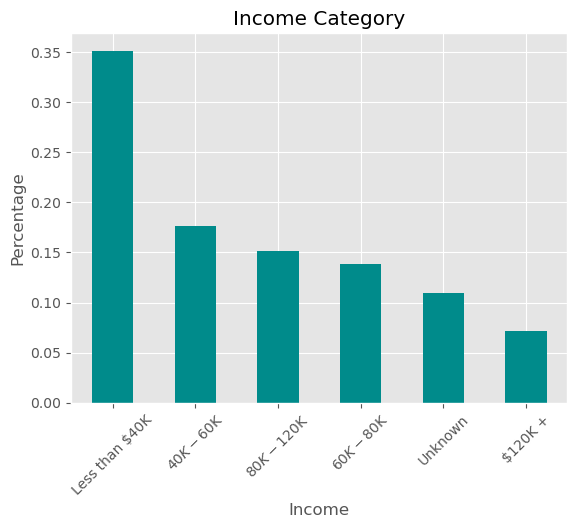

In [19]:
df['Income_Category'].value_counts(normalize=True).plot(kind='bar', color='darkcyan')
plt.title('Income Category')
plt.xlabel('Income')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In [41]:
y = (df['Attrition_Flag'] == 'Attrited Customer').astype(int)
fields = list(df.columns[1:])  
correlations = df[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

Total_Trans_Ct             -0.371403
Total_Ct_Chng_Q4_Q1        -0.290054
Total_Revolving_Bal        -0.263053
Avg_Utilization_Ratio      -0.178410
Total_Trans_Amt            -0.168598
Total_Relationship_Count   -0.150005
Total_Amt_Chng_Q4_Q1       -0.131063
Credit_Limit               -0.023873
Avg_Open_To_Buy            -0.000285
Months_on_book              0.013687
Customer_Age                0.018203
Dependent_count             0.018991
Months_Inactive_12_mon      0.152449
Contacts_Count_12_mon       0.204491
dtype: float64

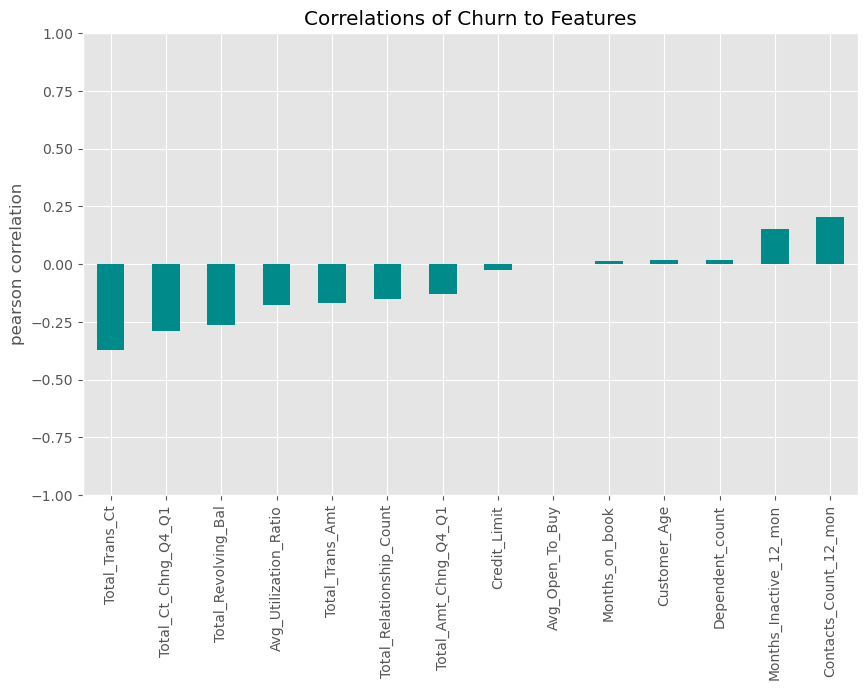

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
ax = correlations.plot(kind='bar', color='darkcyan')
ax.set_title('Correlations of Churn to Features')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [43]:
df['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [44]:
churn_status = ['not churned', 'churned']
not_churned_count = len(df[df['Attrition_Flag'] == 'Existing Customer'])
churned_count = len(df[df['Attrition_Flag'] == 'Attrited Customer'])

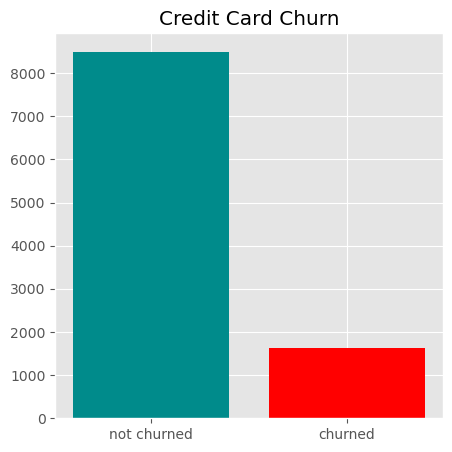

In [45]:
fig = plt.figure(figsize=(5,5))

plt.bar(churn_status, [not_churned_count, churned_count], label=churn_status, color=['darkcyan', 'red'])
plt.title('Credit Card Churn')
plt.show()

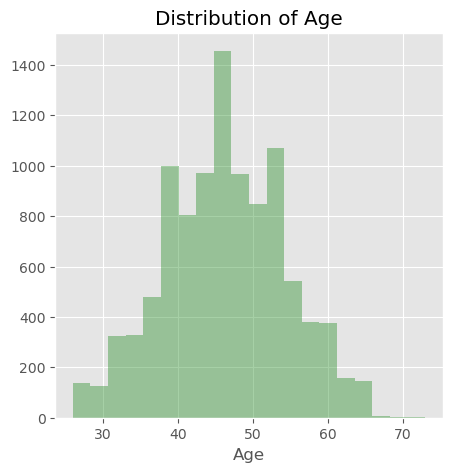

In [46]:
fig = plt.figure(figsize=(5,5))

sns.distplot(df['Customer_Age'], kde=False, color='forestgreen', bins=20)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

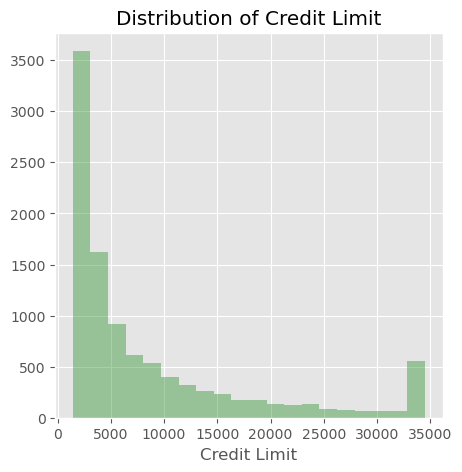

In [47]:
fig = plt.figure(figsize=(5,5))

sns.distplot(df['Credit_Limit'], kde=False, color='forestgreen', bins=20)
plt.xlabel('Credit Limit')
plt.title('Distribution of Credit Limit')
plt.show()

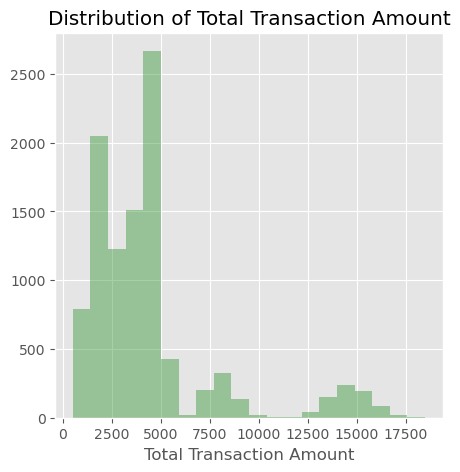

In [48]:
fig = plt.figure(figsize=(5,5))

sns.distplot(df['Total_Trans_Amt'], kde=False, color='forestgreen', bins=20)
plt.xlabel('Total Transaction Amount')
plt.title('Distribution of Total Transaction Amount')
plt.show()

### Data Preprocessing

#### Binarize and Encode Catagorical Variables

In [49]:
categories = df.describe(include='object').columns

for category in categories:
    if len(df[category].unique()) == 2:
        lb = LabelBinarizer()
        df[category] = lb.fit_transform(df[category])
    else:
        le = LabelEncoder()
        df[category] = le.fit_transform(df[category])

In [50]:
feature_cols = df.columns[1:]
feature_cols

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

#### SMOTE to Balance Classes

In [51]:
# assign variables for target and features and use SMOTE to balance classes

X = df[feature_cols]
y = df['Attrition_Flag']

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

#### Split Train and Test Data

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, shuffle=True, random_state=108)

#### Scale Train and Test Data

In [54]:
# scale variables

mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [55]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (13600, 19)
X_test: (3400, 19)
y_train: (13600,)
y_test: (3400,)


In [128]:
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

### Classification Models to Predict Credit Card Churn

#### Logistic Regression

In [57]:
lr = LogisticRegression(solver='liblinear')
lr = lr.fit(X_train, y_train)

In [58]:
pkl.dump(lr, open('lr_model.pkl', 'wb'))

In [59]:
lr_model = pkl.load(open('lr_model.pkl', 'rb'))

In [60]:
lr_pred = lr.predict(X_test)

In [130]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

model_list.append('Logistic Regression')
accuracy_list.append(lr_accuracy)
precision_list.append(lr_precision)
recall_list.append(lr_recall)
f1_list.append(lr_f1)

In [62]:
print(classification_report(y_test, lr_pred))
print('Accuracy:', np.round(accuracy_score(y_test, lr_pred), 3))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1700
           1       0.86      0.86      0.86      1700

    accuracy                           0.86      3400
   macro avg       0.86      0.86      0.86      3400
weighted avg       0.86      0.86      0.86      3400

Accuracy: 0.86


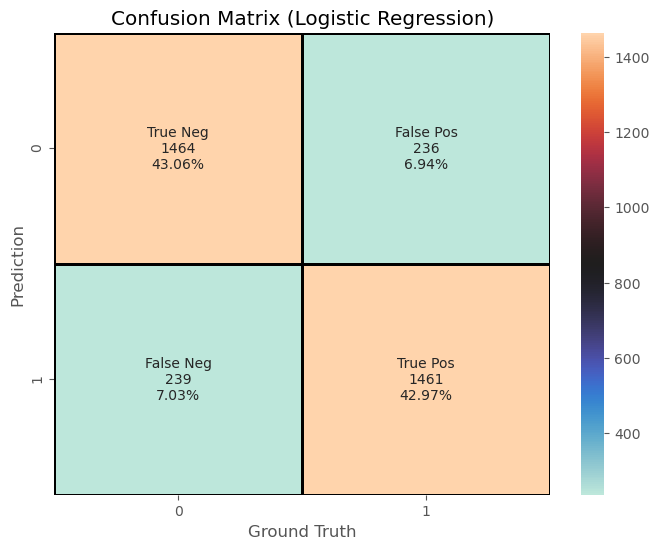

In [105]:
cm = confusion_matrix(y_test, lr_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

fig = plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=labels, cmap='icefire', linecolor='black', linewidths=1, fmt='')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

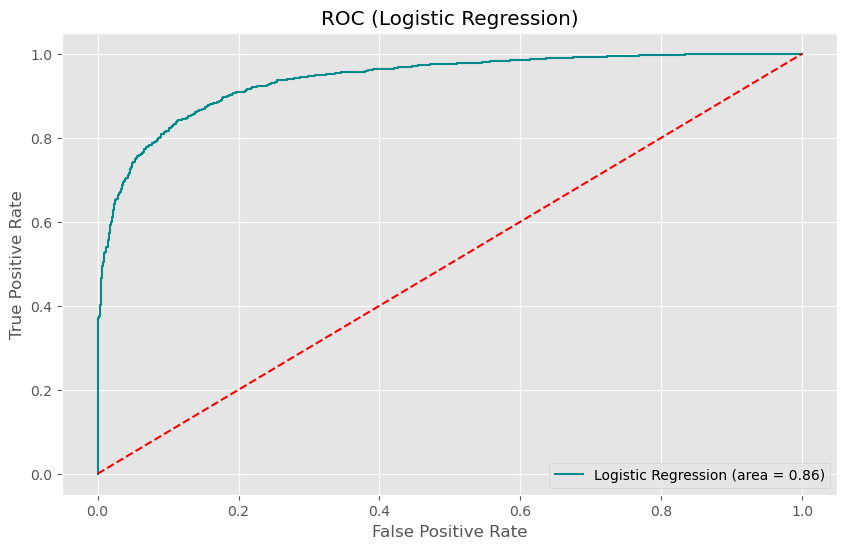

In [147]:
lr_roc_auc = roc_auc_score(y_test, lr_pred) 
fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:,1]) 
plt.figure(figsize = (10,6)) 
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc, color='darkcyan') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC (Logistic Regression)') 
plt.legend(loc="lower right") 
plt.show()

#### Random Forest Classifier

In [68]:
rc = RandomForestClassifier()

n_estimators = list(np.linspace(100, 1500, 10).astype(int))
max_depth = list(np.linspace(10, 110, 11).astype(int))
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rc = RandomizedSearchCV(estimator=rc, param_distributions=random_grid, n_iter=100, 
                               cv=3, verbose=2, random_state=108, 
                               scoring='accuracy', n_jobs=-1)

rc.fit(X_train, y_train)
print(rc.best_estimator_)
print(rc.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
RandomForestClassifier(max_depth=110, n_estimators=1344)
{'n_estimators': 1344, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 110}


In [69]:
pkl.dump(rc, open('rc_model.pkl', 'wb'))

In [70]:
rc_model = pkl.load(open('rc_model.pkl', 'rb'))

In [71]:
rc_pred = rc.predict(X_test)

In [132]:
rc_accuracy = accuracy_score(y_test, rc_pred)
rc_precision = precision_score(y_test, rc_pred)
rc_recall = recall_score(y_test, rc_pred)
rc_f1 = f1_score(y_test, rc_pred)

model_list.append('Random Forest')
accuracy_list.append(rc_accuracy)
precision_list.append(rc_precision)
recall_list.append(rc_recall)
f1_list.append(rc_f1)

In [73]:
print(classification_report(y_test, rc_pred))
print('Accuracy:', np.round(accuracy_score(y_test, rc_pred), 3))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1700
           1       0.99      0.97      0.98      1700

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400

Accuracy: 0.978


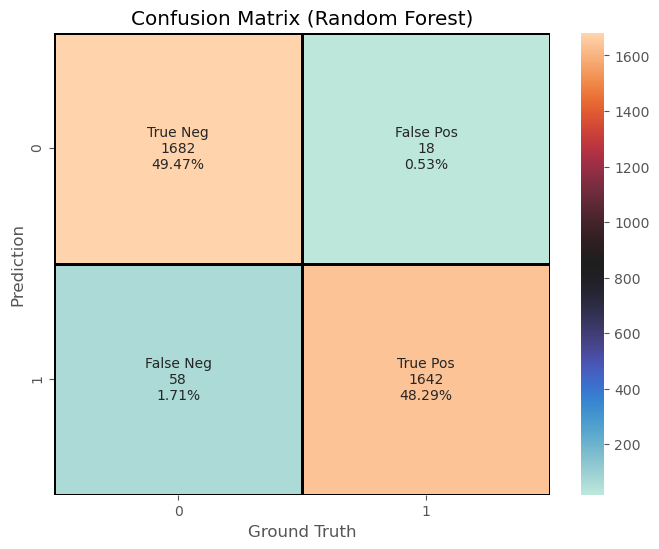

In [104]:
cm = confusion_matrix(y_test, rc_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

fig = plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=labels, cmap='icefire', linecolor='black', linewidths=1, fmt='')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

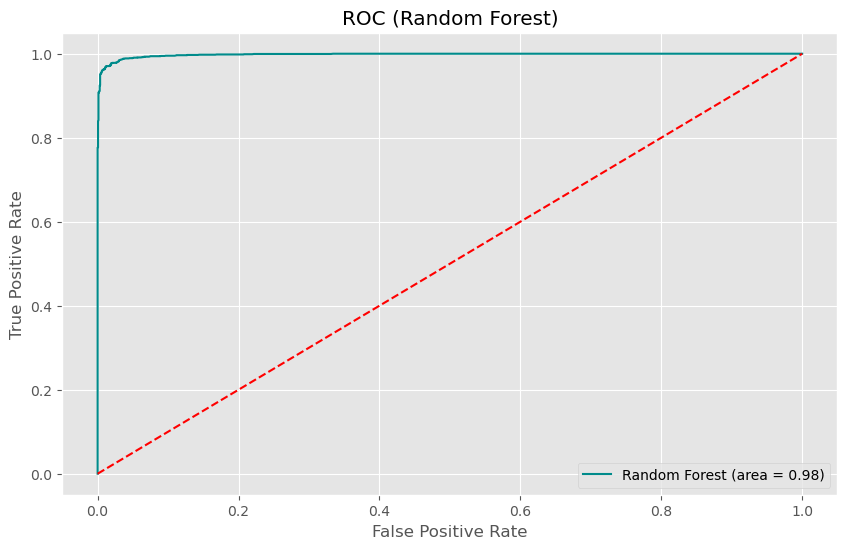

In [148]:
rc_roc_auc = roc_auc_score(y_test, rc_pred) 
fpr, tpr, _ = roc_curve(y_test, rc.predict_proba(X_test)[:,1]) 
plt.figure(figsize = (10,6)) 
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rc_roc_auc, color='darkcyan') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC (Random Forest)') 
plt.legend(loc="lower right") 
plt.show()

#### XGBoost

In [82]:
xgb = XGBClassifier()

gamma = [0, 1, 2]
max_depth = [4, 6, 8]
subsample = [0.25, 0.5, 1]
num_parallel_tree = [1, 2]

param_grid = {'gamma': gamma,
               'max_depth': max_depth,
               'subsample': subsample,
               'num_parallel_tree': num_parallel_tree}

xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, verbose=2, scoring='accuracy', n_jobs=-1)

xgb.fit(X_train, y_train)
print(xgb.best_estimator_)
print(xgb.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[07:21:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=2, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'gamma':

In [83]:
pkl.dump(xgb, open('xgb_model.pkl', 'wb'))

In [84]:
xgb = pkl.load(open('xgb_model.pkl', 'rb'))

In [85]:
xgb_pred = xgb.predict(X_test)

In [134]:
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

model_list.append('XGBoost')
accuracy_list.append(xgb_accuracy)
precision_list.append(xgb_precision)
recall_list.append(xgb_recall)
f1_list.append(xgb_f1)

In [87]:
print(classification_report(y_test, xgb_pred))
print('Accuracy:', np.round(accuracy_score(y_test, xgb_pred), 3))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1700
           1       0.99      0.98      0.99      1700

    accuracy                           0.99      3400
   macro avg       0.99      0.99      0.99      3400
weighted avg       0.99      0.99      0.99      3400

Accuracy: 0.986


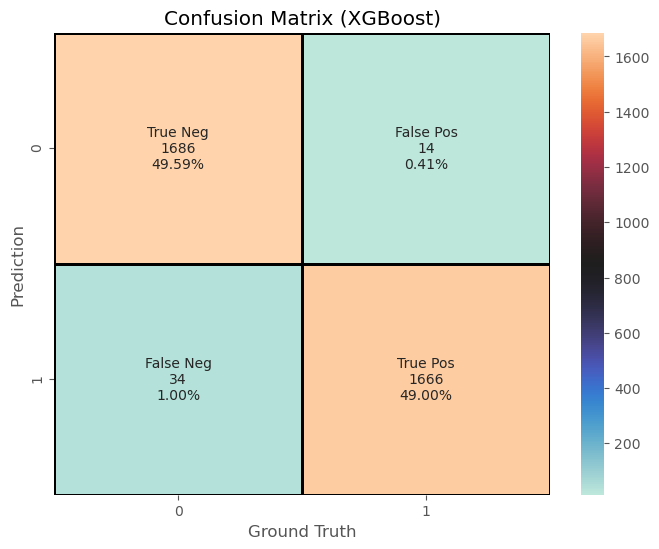

In [103]:
cm = confusion_matrix(y_test, xgb_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

fig = plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=labels, cmap='icefire', linecolor='black', linewidths=1, fmt='')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

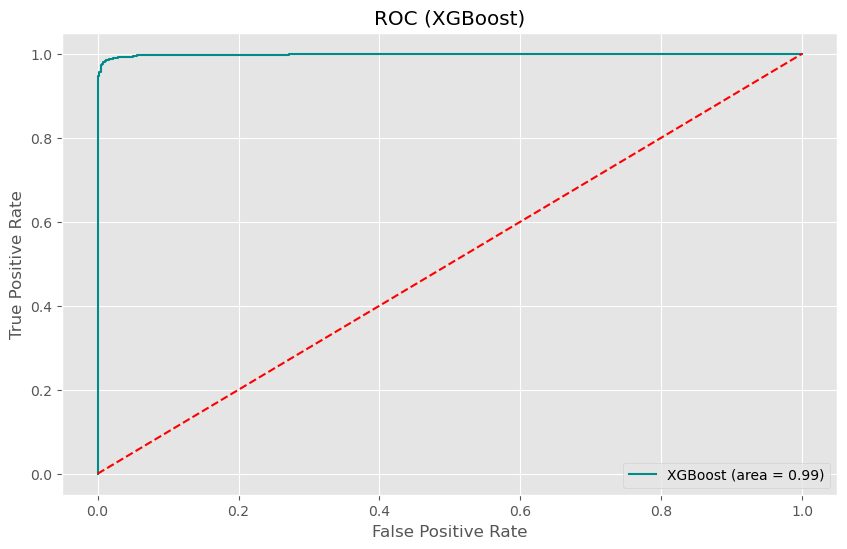

In [149]:
xgb_roc_auc = roc_auc_score(y_test, xgb_pred) 
fpr, tpr, _ = roc_curve(y_test, xgb.predict_proba(X_test)[:,1]) 
plt.figure(figsize = (10,6)) 
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc, color='darkcyan') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC (XGBoost)') 
plt.legend(loc="lower right") 
plt.show()

#### CatBoost

In [92]:
cb = CatBoostClassifier()

iterations = [500, 750, 1000, 1500]
learning_rate = [1e-2, 0.03, 0.1]
depth = [2, 4, 6, 8]
grow_policy = ['SymmetricTree', 'Depthwise', 'LossGuide']

param_grid = {'iterations': iterations,
               'learning_rate': learning_rate,
               'depth': depth,
               'grow_policy': grow_policy}

cb = GridSearchCV(estimator=cb, param_grid=param_grid, verbose=2, scoring='accuracy', n_jobs=-1)

cb.fit(X_train, y_train)
print(cb.best_estimator_)
print(cb.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
0:	learn: 0.6868757	total: 185ms	remaining: 1m 32s
1:	learn: 0.6811235	total: 208ms	remaining: 51.7s
2:	learn: 0.6750030	total: 226ms	remaining: 37.5s
3:	learn: 0.6691412	total: 246ms	remaining: 30.5s
4:	learn: 0.6633218	total: 265ms	remaining: 26.2s
5:	learn: 0.6579234	total: 284ms	remaining: 23.4s
6:	learn: 0.6524465	total: 304ms	remaining: 21.4s
7:	learn: 0.6472780	total: 323ms	remaining: 19.8s
8:	learn: 0.6419827	total: 346ms	remaining: 18.9s
9:	learn: 0.6372953	total: 366ms	remaining: 17.9s
10:	learn: 0.6322458	total: 387ms	remaining: 17.2s
11:	learn: 0.6273353	total: 413ms	remaining: 16.8s
12:	learn: 0.6226676	total: 442ms	remaining: 16.6s
13:	learn: 0.6180834	total: 464ms	remaining: 16.1s
14:	learn: 0.6135053	total: 485ms	remaining: 15.7s
15:	learn: 0.6090247	total: 504ms	remaining: 15.3s
16:	learn: 0.6047140	total: 524ms	remaining: 14.9s
17:	learn: 0.5998784	total: 547ms	remaining: 14.6s
18:	learn: 0.5958025	total: 

In [93]:
pkl.dump(cb, open('cb_model.pkl', 'wb'))

In [94]:
cb = pkl.load(open('cb_model.pkl', 'rb'))

In [95]:
cb_pred = cb.predict(X_test)

In [135]:
cb_accuracy = accuracy_score(y_test, cb_pred)
cb_precision = precision_score(y_test, cb_pred)
cb_recall = recall_score(y_test, cb_pred)
cb_f1 = f1_score(y_test, cb_pred)

model_list.append('CatBoost')
accuracy_list.append(cb_accuracy)
precision_list.append(cb_precision)
recall_list.append(cb_recall)
f1_list.append(cb_f1)

In [97]:
print(classification_report(y_test, cb_pred))
print('Accuracy:', np.round(accuracy_score(y_test, cb_pred), 3))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1700
           1       0.95      0.92      0.93      1700

    accuracy                           0.94      3400
   macro avg       0.94      0.94      0.93      3400
weighted avg       0.94      0.94      0.93      3400

Accuracy: 0.935


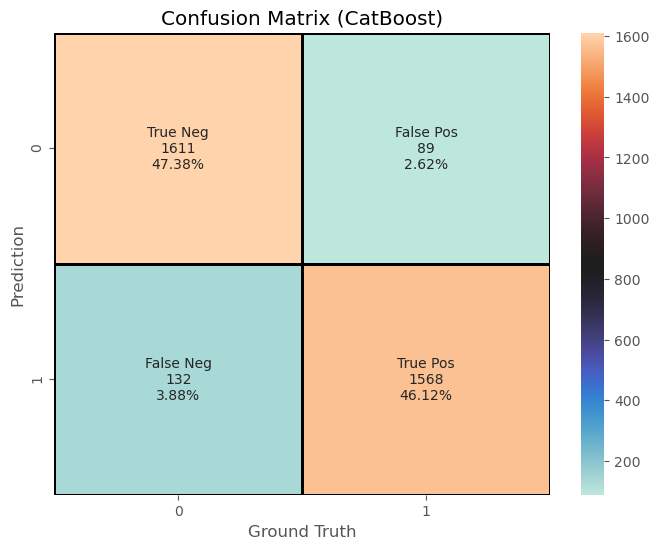

In [101]:
cm = confusion_matrix(y_test, cb_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

fig = plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=labels, cmap='icefire', linecolor='black', linewidths=1, fmt='')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Confusion Matrix (CatBoost)')
plt.show()

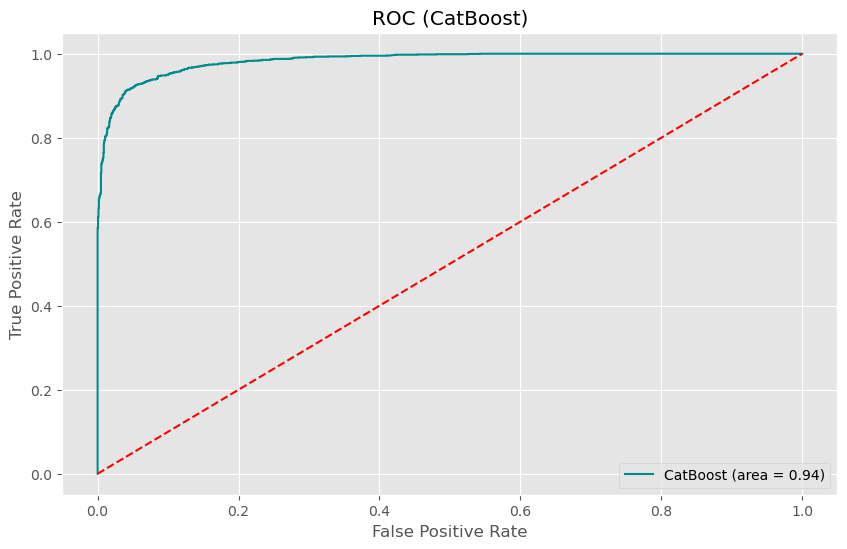

In [150]:
cb_roc_auc = roc_auc_score(y_test, cb_pred) 
fpr, tpr, _ = roc_curve(y_test, cb.predict_proba(X_test)[:,1]) 
plt.figure(figsize = (10,6)) 
plt.plot(fpr, tpr, label='CatBoost (area = %0.2f)' % cb_roc_auc, color='darkcyan') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC (CatBoost)') 
plt.legend(loc="lower right") 
plt.show()

#### Voting Classifier

In [106]:
classifiers = [('RC', rc), ('XGB', xgb)]
vc = VotingClassifier(classifiers, voting='soft')
vc = vc.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[10:09:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [107]:
pkl.dump(vc, open('voting_model.pkl', 'wb'))

In [108]:
voting_model = pkl.load(open('voting_model.pkl', 'rb'))

In [109]:
vc_pred = vc.predict(X_test)

In [136]:
vc_accuracy = accuracy_score(y_test, vc_pred)
vc_precision = precision_score(y_test, vc_pred)
vc_recall = recall_score(y_test, vc_pred)
vc_f1 = f1_score(y_test, vc_pred)

model_list.append('Voting Classifier')
accuracy_list.append(vc_accuracy)
precision_list.append(vc_precision)
recall_list.append(vc_recall)
f1_list.append(vc_f1)

In [111]:
print(classification_report(y_test, vc_pred))
print('Accuracy:', np.round(accuracy_score(y_test, vc_pred), 3))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1700
           1       0.99      0.98      0.98      1700

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400

Accuracy: 0.984


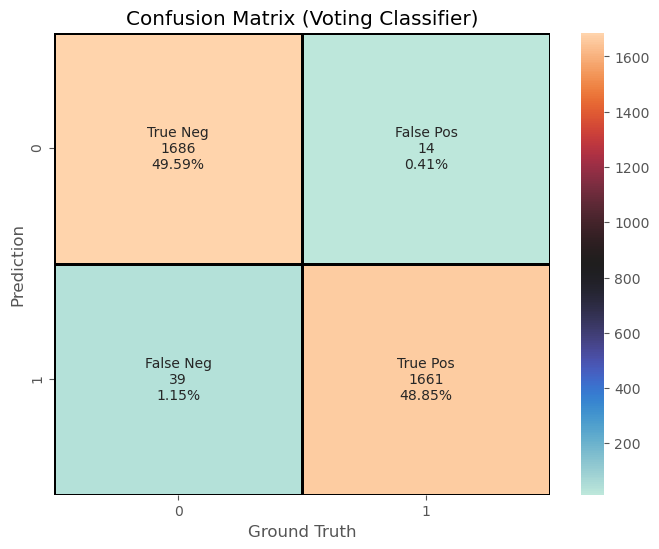

In [112]:
cm = confusion_matrix(y_test, vc_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

fig = plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=labels, cmap='icefire', linecolor='black', linewidths=1, fmt='')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Confusion Matrix (Voting Classifier)')
plt.show()

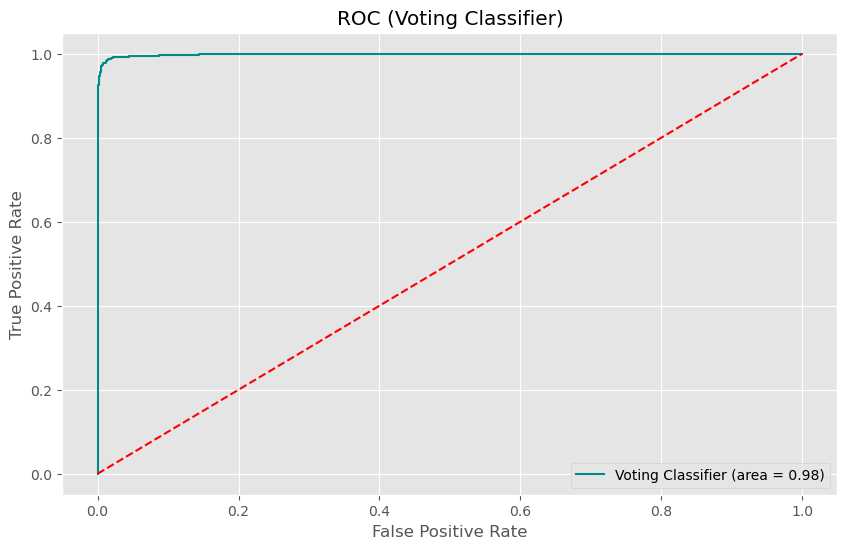

In [151]:
vc_roc_auc = roc_auc_score(y_test, vc_pred) 
fpr, tpr, _ = roc_curve(y_test, vc.predict_proba(X_test)[:,1]) 
plt.figure(figsize = (10,6)) 
plt.plot(fpr, tpr, label='Voting Classifier (area = %0.2f)' % vc_roc_auc, color='darkcyan') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC (Voting Classifier)') 
plt.legend(loc="lower right") 
plt.show()

#### Overview of Scores for Models

In [137]:
data = {'model': model_list, 'accuracy': accuracy_list, 'precision': precision_list, 'recall': recall_list, 'f1': f1_list}
df_scores = pd.DataFrame(data, columns=['model', 'accuracy', 'precision', 'recall', 'f1'])
df_scores.style.background_gradient(cmap='YlGnBu')

,model,accuracy,precision,recall,f1
0,Logistic Regression,0.860294,0.860931,0.859412,0.860171
1,Random Forest,0.977647,0.989157,0.965882,0.977381
2,XGBoost,0.985882,0.991667,0.980000,0.985799
3,CatBoost,0.935000,0.946288,0.922353,0.934167
4,Voting Classifier,0.984412,0.991642,0.977059,0.984296


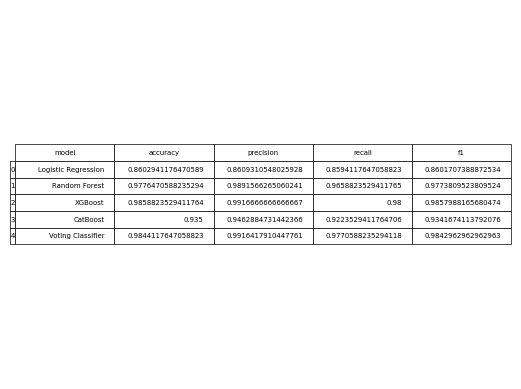

In [146]:
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
table(ax, df_scores, loc='center') 
plt.savefig('scores.png')